# Transformations of the plane 

Tech 411.05 *Patterns and Symmetry*, University of New Hampshire, J. Gibson 2025-09-18.

This is an interactive computational notebook in the Julia programming language.
It shows you how to make plots and work with vectors and matrices in Julia,
continues our work from last time on transformations of the plane, and gives you
a few problems to hone your skills.

Julia is similar in syntax and style to Matlab and Python. Key features of Julia
  * open-source (free to download and use)
  * general-purpose programming language
  * special attention to mathematics 
  * robust built-in libraries and 3rd-party packages 
  * interactive but fast as compiled C/Fortran
  * from MIT, version 1.0 in 2016, now at 1.11
  

# 1. Plots

## Plot some trig functions.

Plot $\sin(x)$ and $\cos(x)$ versus $x$ over the range $-\pi \leq x \leq \pi$.

(Execute the code cell below by clicking on it and then hitting shift-enter.)

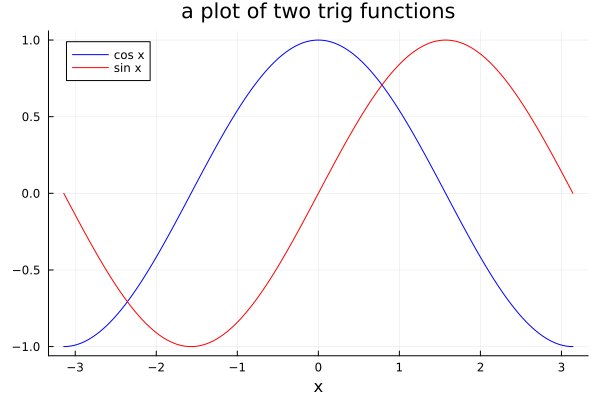

In [1]:
using Plots            # load a plotting library

x = range(-π, π, 200)  # make a vector of 200 evenly-spaced points between -π and π

plot(x, cos.(x), color=:blue, label="cos x")  # evaluate cos(x[i]) for each x[i] in vector x, then plot
plot!(x, sin.(x), color=:red, label="sin x")
plot!(xlabel="x", title="a plot of two trig functions")

In [ ]:
x = range(-π, π, 200) # specify a range of 200 evenly spaced numbers between -π and π

In [ ]:
collect(x)  # collect those values into a vector of numbers

In [ ]:
sin(x)  # apply sin function to vector x (error!)

In [ ]:
sin.(x) # apply sin function to vector x elementwise (works!)

In [ ]:
plot(x, sin.(x)) # plot vector of x values against vector of y = sin.(x) values

## Plot a quadratic and its roots


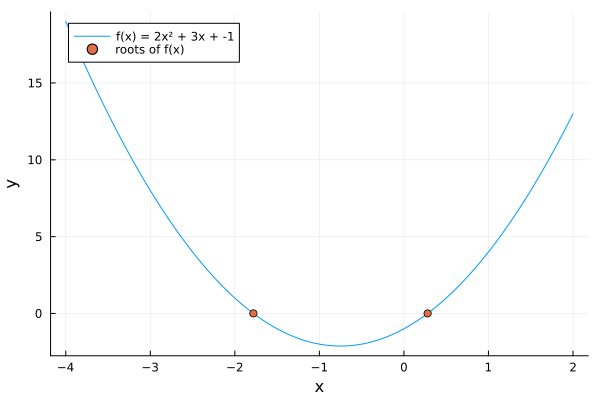

In [2]:
a = 2; b = 3; c = -1

f(x) = a*x^2 + b*x + c

x = range(-4,2,200)
plot(x, f.(x), label="f(x) = $(a)x² + $(b)x + $c")

roots = [(-b + sqrt(b^2 - 4a*c))/(2a); (-b - sqrt(b^2 - 4a*c))/(2a)]

scatter!(roots, f.(roots), label="roots of f(x)")
plot!(xlabel="x", ylabel="y", legend=:topleft)

## Plot a square with labeled vertices

Here's a function that plots a polygon with labeled vertices. We'll
use it later when studying transformations of the square.

In [3]:
# define a function that plots a polygon with labeled vertices
# input P is a 2 x (n+1) matrix, specifying the vertices of the polygon

function plotpolygon!(P; color=:blue, title="", xylim=2) 

    plot!(P[1,:], P[2,:], series_type=:path, fill=true, color=color, alpha=0.25)

    N = size(P,2)-1                 # number of distinct vertices
    labels = ['α' + n for n in 0:N] # produce ['α', 'β', 'γ', ...]
    labels[N+1] = ' '               # replace last label with blank

    c = [sum(P[1,1:N])/N; sum(P[2,1:N])/N]  # center of polygon, avg of vertices
    L = 0.7*(P .- c) .+ c                   # locate labels just inside vertices

    annotate!(L[1,:], L[2,:], labels)       # write labels
    plot!(aspect_ratio=1, legend=:none)
    plot!(xlim=(-xylim,xylim), ylim=(-xylim,xylim))
    plot!(title=title, size=(300,300))
end

function plotpolygon(P; color=:blue, title="", xylim=2)
    plot()                  # wipe out last plot
    plotpolygon!(P, color=color, title=title, xylim=xylim)  
end

plotpolygon (generic function with 1 method)

In [4]:
# Represent a square by a matrix of its vertex coordinates
# starting with upper right and going counterclockwise.
# Repeat the 1st vertex so the plot closes. 

P = [
    1 -1 -1  1  1;  # x coordinates of vertices
    1  1 -1 -1  1   # y coordinates of vertices
]

2×5 Matrix{Int64}:
 1  -1  -1   1  1
 1   1  -1  -1  1

In [5]:
P = [1 -1 -1 1 1; 1  1 -1 -1 1]   # same as above in one line

2×5 Matrix{Int64}:
 1  -1  -1   1  1
 1   1  -1  -1  1

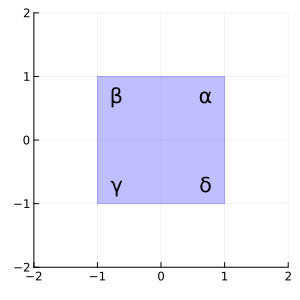

In [6]:
p1 = plotpolygon(P, color=:blue)

# 2. Vectors and matrices

A quick set of examples of how to create and use vectors and matrices.

In [7]:
# initialize a 2d vector x using square brackets

x = [2; 3]

2-element Vector{Int64}:
 2
 3

In [8]:
# initialize a 2x2 matrix A using square brackets

A = [1 -2; -1.5 0.5 ]

2×2 Matrix{Float64}:
  1.0  -2.0
 -1.5   0.5

In [9]:
# do a matrix-vector multiplication

y = A*x

2-element Vector{Float64}:
 -4.0
 -1.5

In [10]:
# access components of vectors and matrices with square brackets

y[1]

-4.0

In [11]:
A

2×2 Matrix{Float64}:
  1.0  -2.0
 -1.5   0.5

In [12]:
A[1,2]

-2.0

In [ ]:
# Julia prints the value of the last statement executed,
# but you can show a bunch of values with @show macro

@show x[1]
@show x[2]
@show A[1,2]
@show A*x

### Getting rows and cols of a matrix


In [13]:
# define a matrix with A_ij = 10i + j

A = [
    11 12 13 14;
    21 22 23 24;
    31 32 33 34;
    41 42 43 44
]

4×4 Matrix{Int64}:
 11  12  13  14
 21  22  23  24
 31  32  33  34
 41  42  43  44

In [14]:
# same, programmatically

A = [10i + j for i in 1:4, j in 1:4]

4×4 Matrix{Int64}:
 11  12  13  14
 21  22  23  24
 31  32  33  34
 41  42  43  44

In [15]:
# get 3rd column of A

A[:,3]   # 3rd row, all columns

4-element Vector{Int64}:
 13
 23
 33
 43

In [16]:
A[2:4, 3]   # rows 2 through 4 in 3rd column

3-element Vector{Int64}:
 23
 33
 43

In [17]:
A[1,:]   # get 1st row of A

4-element Vector{Int64}:
 11
 12
 13
 14

In [ ]:
# get lower-right 2x2 submatrix 

A[3:4, 3:4]

# 3. Visualizations of $y=Ax$

In [18]:
# Define some functions for plotting vectors in plane, defaulting to blue with no label
# (plot line from origin [0; 0] to v = [v[1]; v[2]])

function plotvec!(v; color=:blue, label="", xylim=3) 
    plot!([0; v[1]], [0; v[2]], arrow=:arrow, linecolor=color, label=label, aspect_ratio=:equal)
    plot!(xlim=(-xylim,xylim), ylim=(-xylim,xylim), size=(300,300))
end

function plotvec(v; color=:blue, label="", xylim=3) 
    plot()
    plotvec!(v, color=color, label=label, xylim=xylim)
end

plotvec (generic function with 1 method)

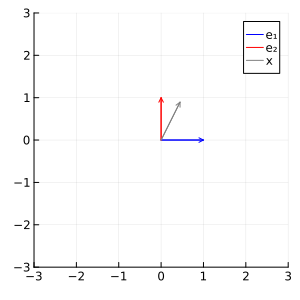

In [19]:
# define unit vectors along x₁, x₂ axes, plot 
e₁ = [1; 0]
e₂ = [0; 1]

# define a unit vector in direction (1,2)
x = [1/sqrt(5); 2/sqrt(5)]

# make plot of unit vectors
plotvec(e₁,  color=:blue, label="e₁")
plotvec!(e₂, color=:red, label="e₂")
plotvec!(x, color=:grey, label="x")

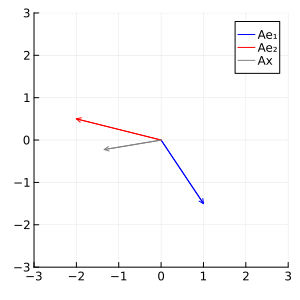

In [20]:
# Make plot of A * unit vectors

A = [1 -2; -1.5 0.5 ]

plotvec(A*e₁, color=:blue, label="Ae₁")
plotvec!(A*e₂, color=:red, label="Ae₂")
plotvec!(A*x, color=:gray, label="Ax")

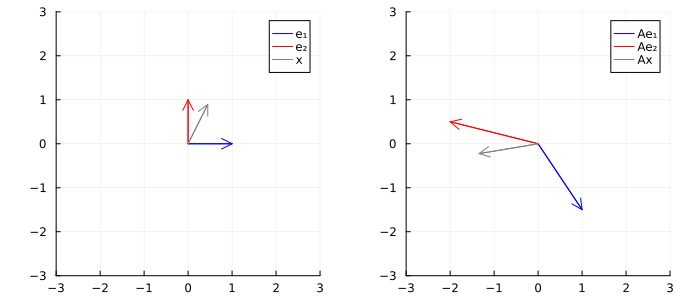

In [21]:
# put those plots side-by-side

plotvec(e₁, color=:blue, label="e₁")
plotvec!(e₂, color=:red, label="e₂")
p1 = plotvec!(x, color=:gray, label="x")

plotvec(A*e₁, color=:blue, label="Ae₁")
plotvec!(A*e₂, color=:red, label="Ae₂")
p2 = plotvec!(A*x, color=:gray, label="Ax")

plot(p1,p2, size=(700,300))

In [22]:
# Add a unit circle and its map to the plots

θ = range(0, 2π, length=200)

circle = [cos.(θ)'; sin.(θ)']  # ' is the tranpose operator, turns col vec into row vec

2×200 Matrix{Float64}:
 1.0  0.999502   0.998007   0.995517   0.992035  …   0.999502    1.0
 0.0  0.0315685  0.0631056  0.0945798  0.12596      -0.0315685  -2.44929e-16

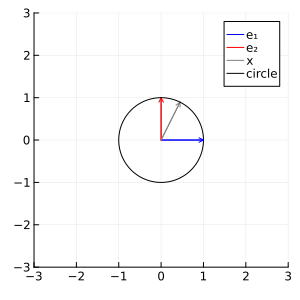

In [23]:
plot(p1) # redraw plot p1
p3 = plot!(circle[1,:], circle[2,:], linecolor=:black, label="circle")

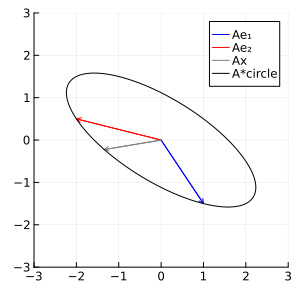

In [24]:
Acircle = A*circle # compute transformed circle

plot(p2) # redraw plot p2
p4 = plot!(Acircle[1,:], Acircle[2,:], linecolor=:black, label="A*circle")

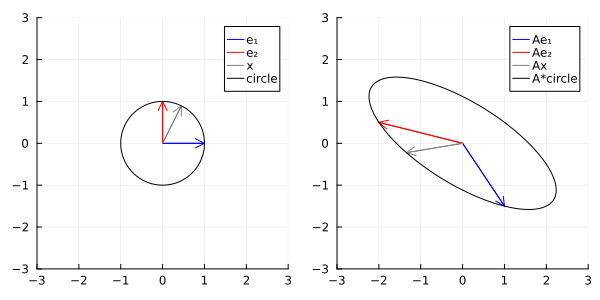

In [25]:
# show those plots side-by-side
plot(p3,p4, size=(600,300))

## <font color='green'>Problem: plot a rotated circle </font>

Make a plot similar to the above, but replacing the transformation matrix $A$
with a rotation matrix $R$ with some angle (you choose). No need to repeat all
the steps one by one, just put all the code together in one cell.

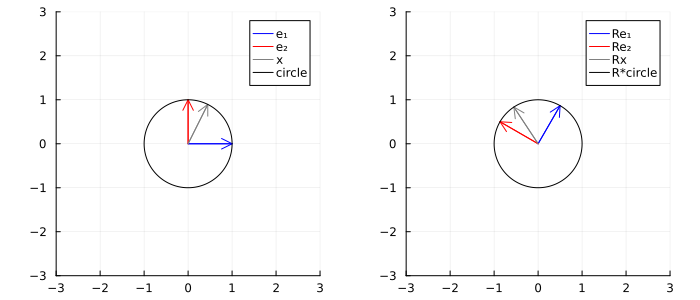

In [30]:
plotvec(e₁, color=:blue, label="e₁")
plotvec!(e₂, color=:red, label="e₂")
plotvec!(x, color=:gray, label="x")
p1 = plot!(circle[1,:], circle[2,:], linecolor=:black, label="circle")

θ = pi/3
R = [cos(θ) -sin(θ); sin(θ) cos(θ)]
Rcircle = R*circle

plotvec(R*e₁, color=:blue, label="Re₁")
plotvec!(R*e₂, color=:red, label="Re₂")
plotvec!(R*x, color=:gray, label="Rx")
p2 = plot!(Rcircle[1,:], Rcircle[2,:], linecolor=:black, label="Rplot!(circle[1,:], circle[2,:], linecolor=:black, label="circle")*circle")

plot(p1,p2, size=(700,300))

## Plot a labeled square transformed by $A$

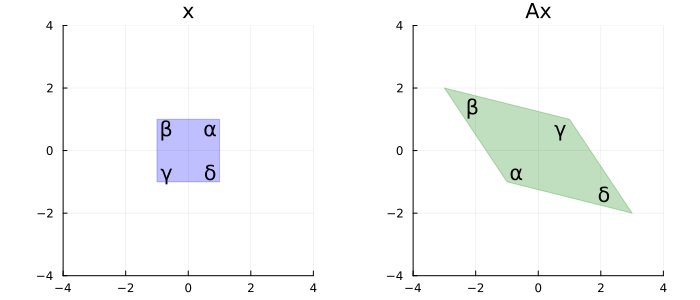

In [31]:
A = [1 -2; -3/2 1/2 ] # transformation matrix

P = [1 -1 -1  1  1; # x coords of vertices
     1  1 -1 -1  1] # y coords of vertices

p1 = plotpolygon(P, color=:blue, title="x", xylim=4)
p2 = plotpolygon(A*P, color=:green, title="Ax", xylim=4) # change color for fun
plot(p1,p2, size=(700,300))

## <font color='green'> Problem: plot the labeled square rotated by $\pi/6$

Show the original square on the left and the rotated square on the right.
Make the rotated square green. 

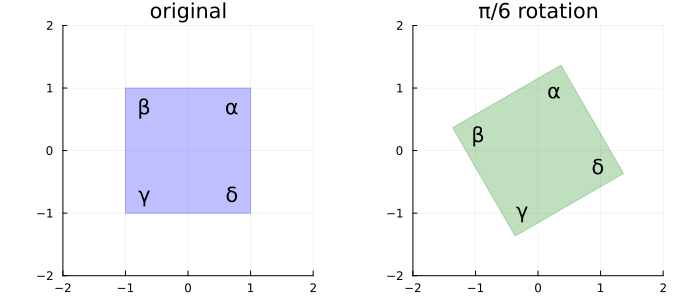

In [32]:
θ = π/6
R = [cos(θ) -sin(θ); sin(θ) cos(θ)]

p1 = plotpolygon(P, title="original", color=:blue)
p2 = plotpolygon(R*P, title="π/6 rotation", color=:green) # change color for fun
plot(p1,p2, size=(700,300))

## <font color='green'> Problem: plot the labeled square rotated by $-\pi/2$

Show the original square on the left and the rotated square on the right.

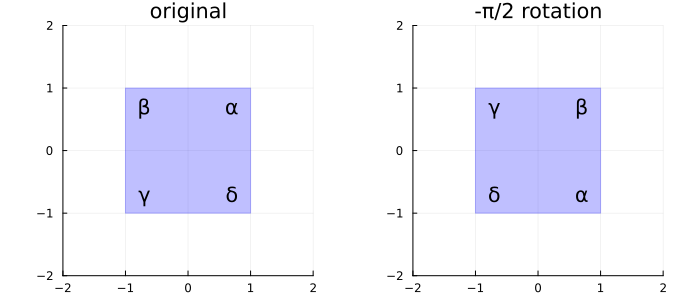

In [33]:
θ = -pi/2
R = [cos(θ) -sin(θ); sin(θ) cos(θ)]

p3 = plotpolygon(R*P, title="-π/2 rotation", color=:blue) # change color for fun
plot(p1,p3, size=(700,300))

Note that, if we start in the upper right and go counter-clockwise, the vertices
in the original square are alphabetically increasing: $[\alpha, \beta, \gamma, \delta]$.

After rotation by $-\pi/2$, starting in the upper-right and going clockwise gives
vertices $[\beta, \gamma, \delta, \alpha]$. This is still alphabetically increasing,
justing wrapping around to $\alpha$ after reaching $\delta$. 

## <font color='green'> Problem: plot the labeled square reflected about vertical axis </font> 

Show the original square on the left and the reflected square on the right. 
Make the reflected square red.

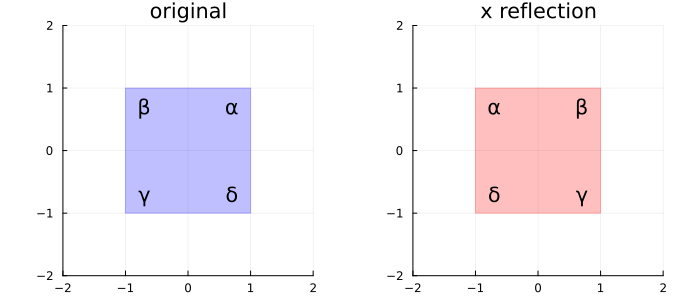

In [34]:
Sx = [-1 0; 0 1]

p4 = plotpolygon(Sx*P, title="x reflection", color=:red) # change color to red
plot(p1,p4, size=(700,300))

Note that when we read off the vertices of the reflected square,
they are $[\beta, \alpha, \delta, \gamma]$. This sequence is alphabetically 
decreasing, wrapping around to $\delta$ after reaching $\alpha$. 

In general, rotations don't change the alphabetical ordering of vertices,
but reflections do.

## Multiple plots in a grid

If you've done the above correctly, you can arrange the last four plots
in a 2 x 2 grid with 

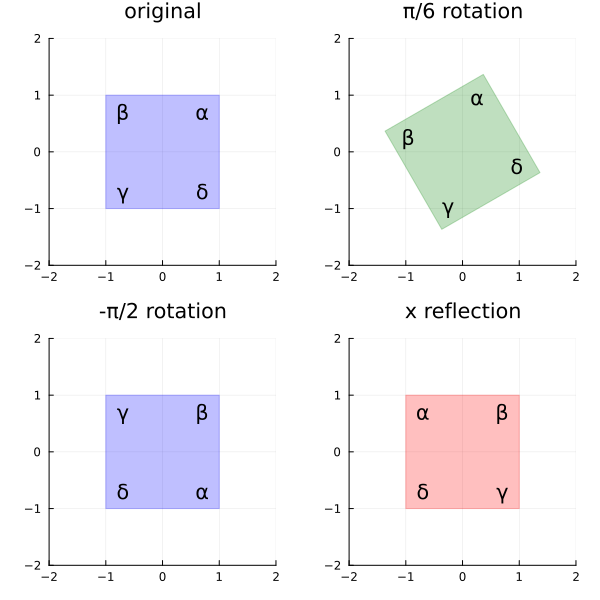

In [35]:
plot(p1,p2,p3,p4, layout=(2,2), size=(600,600))

## <font color='green'>Problem: find and plot all permutations of the square </font>

Some transformations of the plane leave the square the same size and still 
aligned with the coordinate axes, but permute the positions of the vertices. 

For example, your plot of the square rotated by $\pi/2$ shows the transformed 
square still aligned, but with vertices permuted from $[\alpha, \beta, \gamma, \delta]$ 
to $[\delta, \alpha, \beta, \gamma]$. 

Your plot of reflection about the vertical shows the transformed square upright
with vertices permuted from $[\alpha, \beta, \gamma, \delta]$
to $[\beta, \alpha, \delta, \gamma]$.

### <font color='green'>(a)</font> 

Find all the transformations of the plane that leave the square the same size and 
still aligned with the coordinate axes. Make a plot of each transformed square, and
arrange the plots in a grid. Give each subplot a descriptive title so you can track
which is which. Color the transformed squares blue or red if the vertices are
alphabetically increasing or decreasing going counterclockwise.

*Hint:* You might want to start with a piece of paper cut into a square, with
the vertices labeled $\alpha$ through $\delta$ on both sides. How many different
arrangements of the square can you find? Then find matrices that transform the
original square into each of those. 

### <font color='green'>(b)</font>
How many such transformations of the square are there?

### <font color='green'>(c)</font> 

What are the matrices that transform the original square
to each transformed square? Make a text table that shows for each transformation, the matrix,
resulting labeled square, the permuted vertex labels, and the lexigraphical ordering of the labels.


In [ ]:
#      matrix       permutation   ordering
# T₁ = [1 0; 0 1]   [α, β, γ, δ]   increasing
# etc.

### <font color='green'>(d)</font>

See if you can express each of your matrices from (c) as some product of two matrices,
$R$ representing rotation by $\pi/4$ and $S_x$ representing reflection in $x$.

\begin{align*}
R = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} \quad \quad S_x = \begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix}
\end{align*}

Hint: you should be able to express every matrix from (c) as either $R^n$ or $R^n S_x$, where $n=0, 1, 2,$ or $3$. You can figure out what the right powers are by trying them in the computer, or by working them out with
the paper cut-out square. 


## <font color='green'> Problem: transformations of the regular $n$-gon </font>

Choose your favorite regular polygon (equilateral triangle, square, pentagon, hexagon, ...)
and repeat the last problem for this new polygon.


In [26]:
pi


π = 3.1415926535897...